In [47]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib
plt.style.use('fivethirtyeight')
#script, infile = argv

# Individual Call Rate Visualization

In [45]:
i = "../individual_stats/58336.170112.315.SNP50A.imiss"

In [42]:
#So when we read  this into pandas datatable, we see that what we're interested in is the F_MISS statistic
#This is the proportion of missing genotypes per individual
#Our current filtering value is 0.05, so anything that is missing more than 5% of genotypes will be dropped
infile= pd.read_table(i,delim_whitespace=True)
infile.head()

,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS
0,1,SIMUSAM000001211738,Y,28,48407,0.000578
1,1,SIMUSAM000001346584,Y,11,48407,0.000227
2,1,SIMUSAM000000767774,Y,179,48407,0.003698
3,1,SIMUSAM000000520611,Y,18,48407,0.000372
4,1,SIMUSAM000001749492,Y,53,48407,0.001095


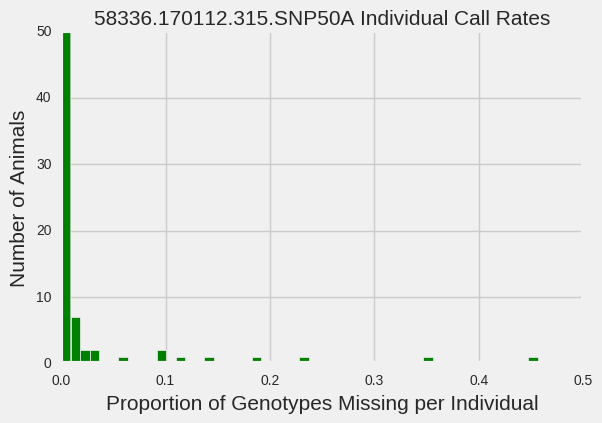

In [43]:
#When we limit the ylimit to ~50, that allows us to pick up the bins with lower frequency values. 
#Notice the y axis.  Not showing all of the animals, vast majority of them are going to have missing genotypes VERY close to zero
#Limiting the y axis allows us to see the animals that are likely being excluded in our analyses.
#Made some changes to color and font size in this.  I think that things look readable, not going to be publishing this stuff
#
ax =infile.F_MISS.plot.hist(bins=50, ylim=(0,50),color='g')
ax.set_axis_bgcolor('white')
ax.set_xlabel("Proportion of Genotypes Missing per Individual")
ax.set_ylabel("Number of Animals")
ax.set_title(title + ' Individual Call Rates')
for item in(ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(15)
    


In [49]:
z=i.strip("../individual_stats/")
title=z.strip('.imiss')
fig = ax.get_figure()
outname=title + '_individual_call_rate.png'
fig.savefig('../allele_stats/figures/'+ outname,format='png')
plt.close('all')
#In final code I changed this section to just write it to the name given by argv
#When doing it that way, that means that it can be named whatever in Snakemake.  

# Allele Call Rate Visualization

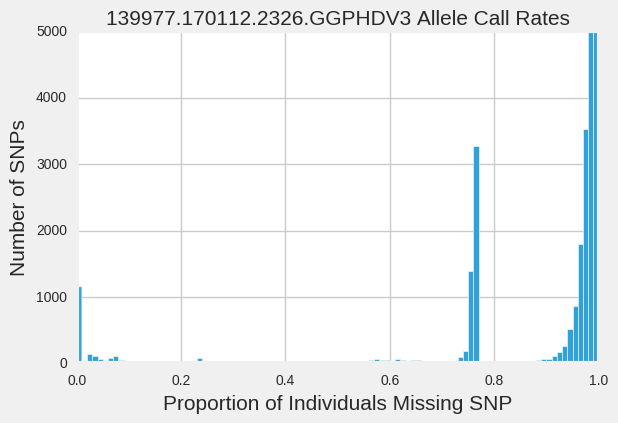

In [73]:
a = '../allele_stats/139977.170112.2326.GGPHDV3.frq'
assay= pd.read_table(a,delim_whitespace=True)
chromosomes = assay.NCHROBS.max() 
#So for this, I'm assuming that there is at least one position that is genotyped on every animal
#If this isn't the case, it is highly unlikely that it would throw calculations off enough, especially for this visualization
assay['Callrate']= assay['NCHROBS']/chromosomes
#This might need to be more variable than in individuals
#Because we have such a difference in call rates for F250 vs. other assays, this might look a little out of whack sometimes
#This looks to be the sweetspot for most assays (100 bins and 5000 as y max)
ax = assay.Callrate.plot.hist(bins = 100, ylim=(0,5000))
ax.set_axis_bgcolor('white')
ax.set_xlabel("Proportion of Individuals Missing SNP")
ax.set_ylabel("Number of SNPs")
z=a.strip("../allele_stats/")
title=z.strip('.frq')
ax.set_title(title + ' Allele Call Rates')
for item in(ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(15)

# HWE P Value Visualization

In [76]:
h = '../hwe_stats/58336.170112.3399.SNP50C.hwe'
assay= pd.read_table(h,delim_whitespace=True)
ax = assay.P.plot.hist(bins = 100)
ax.set_axis_bgcolor('white')
ax.set_xlabel("HWE P-Value")
ax.set_ylabel("Number of SNPs")
z=a.strip("../hwe_stats/")
title=z.strip('.hwe')
ax.set_title(title + ' HWE P-Values')
for item in(ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(15)

,CHR,SNP,TEST,A1,A2,GENO,O(HET),E(HET),P
0,1,51032,ALL(NP),A,B,247/1367/1667,0.416600,0.406300,1.562000e-01
1,1,6496,ALL(NP),A,B,411/1513/1359,0.460900,0.458300,7.608000e-01
2,1,47961,ALL(NP),A,B,27/534/2720,0.162800,0.163200,8.311000e-01
3,1,22465,ALL(NP),A,B,216/1365/1702,0.415800,0.397600,9.549000e-03
4,1,55218,ALL(NP),A,B,192/1151/1940,0.350600,0.358300,2.233000e-01
5,1,24861,ALL(NP),A,B,191/1123/1968,0.342200,0.353400,6.777000e-02
6,1,17760,ALL(NP),B,A,669/1524/1091,0.464100,0.491700,1.244000e-03
7,1,938,ALL(NP),A,B,5/136/3137,0.041490,0.043550,2.157000e-02
8,1,17537,ALL(NP),B,A,475/1478/1328,0.450500,0.466200,5.611000e-02
9,1,854,ALL(NP),B,A,0/18/3266,0.005481,0.005466,1.000000e+00
